<a href="https://colab.research.google.com/github/AlexandraMihalevschi/Data_Science/blob/main/Filme_de_pe_IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filme, filme și iarăși filme. Toți iubesc filmele. Îndeosebi regizorii, persoane lacome de cele de succes. Dar cum să știi ce influențează asupra succesului? Cu aceeași întrebare s-a adresat la noi un nou regizor de filme. Haideți paralel să aflăm ce gen de filme merită atenția clientului.

Ca punct de început am ales setul de date de pe site-ul IMDb. Era nevoie să ajustăm datele, să le analizăm și să le aducem în ordine, pentru ca apoi să putem lucra liber cu ele.

# Analiza datelor

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
#Acestea sunt dataset-urile
movies = pd.read_csv('https://girlsgoitpublic.z6.web.core.windows.net/IMDb_movies.csv')
ratings = pd.read_csv('https://girlsgoitpublic.z6.web.core.windows.net/IMDb_ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Acestea sunt coloanele fiecărui dataset

In [ ]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [ ]:
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [ ]:
ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       



---



Acestea sunt numărul de coloane și rânduri și informația per coloană

In [ ]:
movies.shape

(85855, 22)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [ ]:
movies.value_counts()

imdb_title_id  title                                             original_title                                  year  date_published  genre                      duration  country                            language                  director                 writer                              production_company        actors                                                                                                                                                                                                                                      description                                                                                                                                                                                                                          avg_vote  votes   budget       usa_gross_income  worlwide_gross_income  metascore  reviews_from_users  reviews_from_critics
tt9779516      Cosa mi lasci di te                               I Still Believe           



---





---



In [ ]:
ratings.shape

(85855, 49)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

In [ ]:
ratings.value_counts()

imdb_title_id  weighted_average_vote  total_votes  mean_vote  median_vote  votes_10  votes_9  votes_8  votes_7  votes_6  votes_5  votes_4  votes_3  votes_2  votes_1  allgenders_0age_avg_vote  allgenders_0age_votes  allgenders_18age_avg_vote  allgenders_18age_votes  allgenders_30age_avg_vote  allgenders_30age_votes  allgenders_45age_avg_vote  allgenders_45age_votes  males_allages_avg_vote  males_allages_votes  males_0age_avg_vote  males_0age_votes  males_18age_avg_vote  males_18age_votes  males_30age_avg_vote  males_30age_votes  males_45age_avg_vote  males_45age_votes  females_allages_avg_vote  females_allages_votes  females_0age_avg_vote  females_0age_votes  females_18age_avg_vote  females_18age_votes  females_30age_avg_vote  females_30age_votes  females_45age_avg_vote  females_45age_votes  top1000_voters_rating  top1000_voters_votes  us_voters_rating  us_voters_votes  non_us_voters_rating  non_us_voters_votes
tt9898858      5.1                    10627        5.1        5.0          3



---



Aflăm numărul de date lipsă

In [ ]:
movies.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [ ]:
ratings.isnull().sum()

imdb_title_id                    0
weighted_average_vote            0
total_votes                      0
mean_vote                        0
median_vote                      0
votes_10                         0
votes_9                          0
votes_8                          0
votes_7                          0
votes_6                          0
votes_5                          0
votes_4                          0
votes_3                          0
votes_2                          0
votes_1                          0
allgenders_0age_avg_vote     52496
allgenders_0age_votes        52496
allgenders_18age_avg_vote      706
allgenders_18age_votes         706
allgenders_30age_avg_vote       10
allgenders_30age_votes          10
allgenders_45age_avg_vote       80
allgenders_45age_votes          80
males_allages_avg_vote           1
males_allages_votes              1
males_0age_avg_vote          58444
males_0age_votes             58444
males_18age_avg_vote          1465
males_18age_votes   

Și creeăm ploturi, ce desemnează datele lipsă(cu alb)

Text(0.5, 1.0, 'Reparția datelor lipsă')

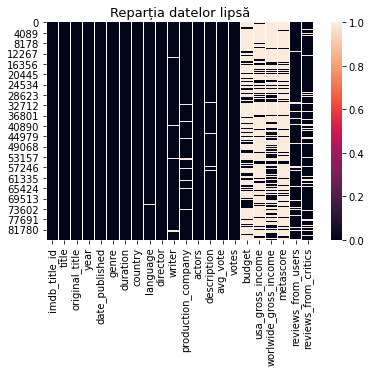

In [ ]:
sns.heatmap(movies.isnull(), cbar=True)
plt.title('Reparția datelor lipsă', fontsize = 13)

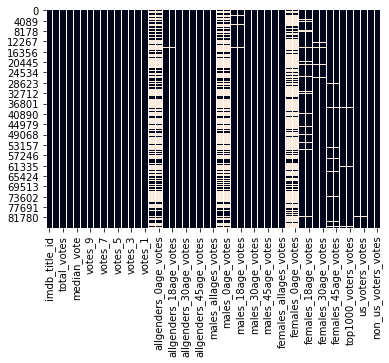

In [ ]:
sns.heatmap(ratings.isnull(), cbar=False)

Acum va fi nevoie să sortăm datele în dependență de gen, limbă și țară. 

# Curățarea datelor

In [ ]:
#aflam numarul de randuri si de coloane din acest set de date
print('Columns:', len(movies.columns))
print('Rows', len(movies))

Columns: 22
Rows 85855


In [ ]:
#restrangem setul la 3 coloane
genre_country_language = movies.loc[:,['genre', 'country', 'language', 'avg_vote', 'votes']]
print(genre_country_language)

                           genre           country  ... avg_vote  votes
0                        Romance               USA  ...      5.9    154
1        Biography, Crime, Drama         Australia  ...      6.1    589
2                          Drama  Germany, Denmark  ...      5.8    188
3                 Drama, History               USA  ...      5.2    446
4      Adventure, Drama, Fantasy             Italy  ...      7.0   2237
...                          ...               ...  ...      ...    ...
85850                     Comedy   France, Belgium  ...      5.3    398
85851              Comedy, Drama       Netherlands  ...      7.7    724
85852                      Drama             India  ...      7.9    265
85853              Drama, Family            Turkey  ...      6.4    194
85854                      Drama             Spain  ...      6.7    102

[85855 rows x 5 columns]


In [ ]:
#restrangem randurile dupa tara SUA
genre_usa = genre_country_language.loc[genre_country_language['country'].isin(['USA'])]
print(genre_usa)

                              genre country language  avg_vote  votes
0                           Romance     USA     None       5.9    154
3                    Drama, History     USA  English       5.2    446
5                  Biography, Drama     USA  English       5.7    484
17                            Drama     USA  English       5.8    187
19                     Crime, Drama     USA  English       6.0    552
...                             ...     ...      ...       ...    ...
85829               Comedy, Romance     USA      NaN       7.5    228
85830                Action, Comedy     USA  English       3.5    326
85837         Action, Crime, Horror     USA  English       6.1   4178
85838  Animation, Adventure, Family     USA  English       5.7    442
85839                Action, Comedy     USA  English       5.1  10627

[28511 rows x 5 columns]


In [ ]:
#restrangem randurile dupa limba engleza
genre_English = genre_usa.loc[genre_usa['language'].isin(['English'])]
print(genre_English)

                              genre country language  avg_vote  votes
3                    Drama, History     USA  English       5.2    446
5                  Biography, Drama     USA  English       5.7    484
17                            Drama     USA  English       5.8    187
19                     Crime, Drama     USA  English       6.0    552
22             Crime, Drama, Horror     USA  English       6.4   1105
...                             ...     ...      ...       ...    ...
85812                        Horror     USA  English       2.3    174
85830                Action, Comedy     USA  English       3.5    326
85837         Action, Crime, Horror     USA  English       6.1   4178
85838  Animation, Adventure, Family     USA  English       5.7    442
85839                Action, Comedy     USA  English       5.1  10627

[24831 rows x 5 columns]


In [ ]:
#facem o lista randurile ramase din coloana de genuri de filme
genre_titles = genre_English['genre'].tolist()
print(genre_titles)

['Drama, History', 'Biography, Drama', 'Drama', 'Crime, Drama', 'Crime, Drama, Horror', 'Western', 'Fantasy, Drama', 'Comedy', 'Family, Fantasy, Adventure', 'Drama', 'Drama', 'Adventure, Family, Fantasy', 'Action, Adventure, Drama', 'Action, Drama, Romance', 'Drama', 'Western', 'Comedy, Drama', 'Drama, Romance', 'Crime, Drama', 'Adventure, Family, Fantasy', 'Drama', 'Drama, Romance', 'Drama, History, War', 'Drama', 'Drama', 'Drama', 'Drama, History, War', 'Drama', 'Biography, Crime, Drama', 'Comedy', 'Action, Adventure, Sci-Fi', 'Drama', 'Drama', 'Drama', 'Adventure, Comedy', 'Crime, Drama', 'Romance, Western', 'Crime, Drama, Romance', 'Western', 'Romance, Western', 'Comedy', 'Comedy, Drama, Romance', 'Drama, History', 'Comedy, Romance', 'Action, Comedy, Drama', 'Action, Adventure, Romance', 'Mystery', 'Drama', 'Fantasy, Romance', 'Comedy, Drama', 'Drama', 'Drama, Western', 'Western', 'Biography, Drama, History', 'Adventure, Drama, History', 'Drama, Romance, War', 'Drama', 'Adventure, 

In [ ]:
#eliminam toate genurile din subliste care nu sunt prime
genre_titles_primordiale = [i.split(maxsplit=1)[0] for i in genre_titles]
print(genre_titles_primordiale)

['Drama,', 'Biography,', 'Drama', 'Crime,', 'Crime,', 'Western', 'Fantasy,', 'Comedy', 'Family,', 'Drama', 'Drama', 'Adventure,', 'Action,', 'Action,', 'Drama', 'Western', 'Comedy,', 'Drama,', 'Crime,', 'Adventure,', 'Drama', 'Drama,', 'Drama,', 'Drama', 'Drama', 'Drama', 'Drama,', 'Drama', 'Biography,', 'Comedy', 'Action,', 'Drama', 'Drama', 'Drama', 'Adventure,', 'Crime,', 'Romance,', 'Crime,', 'Western', 'Romance,', 'Comedy', 'Comedy,', 'Drama,', 'Comedy,', 'Action,', 'Action,', 'Mystery', 'Drama', 'Fantasy,', 'Comedy,', 'Drama', 'Drama,', 'Western', 'Biography,', 'Adventure,', 'Drama,', 'Drama', 'Adventure,', 'Comedy,', 'Adventure,', 'Comedy,', 'Western', 'Adventure,', 'Comedy,', 'Comedy,', 'Family,', 'Romance', 'Drama,', 'Drama,', 'Comedy,', 'Comedy,', 'Drama', 'Comedy,', 'Drama', 'Comedy,', 'Drama,', 'Drama', 'Drama,', 'Drama', 'Drama,', 'Drama,', 'Drama,', 'Comedy,', 'Comedy,', 'Drama', 'Drama', 'Comedy', 'Drama', 'Adventure,', 'Adventure,', 'Drama,', 'Comedy', 'Adventure,', 'Dr

In [ ]:
#selectam doar elementele care au virgula la sfarsit
mylist = genre_titles_primordiale
mylist_commas = [k for k in mylist if ',' in k]
print(mylist_commas)

['Drama,', 'Biography,', 'Crime,', 'Crime,', 'Fantasy,', 'Family,', 'Adventure,', 'Action,', 'Action,', 'Comedy,', 'Drama,', 'Crime,', 'Adventure,', 'Drama,', 'Drama,', 'Drama,', 'Biography,', 'Action,', 'Adventure,', 'Crime,', 'Romance,', 'Crime,', 'Romance,', 'Comedy,', 'Drama,', 'Comedy,', 'Action,', 'Action,', 'Fantasy,', 'Comedy,', 'Drama,', 'Biography,', 'Adventure,', 'Drama,', 'Adventure,', 'Comedy,', 'Adventure,', 'Comedy,', 'Adventure,', 'Comedy,', 'Comedy,', 'Family,', 'Drama,', 'Drama,', 'Comedy,', 'Comedy,', 'Comedy,', 'Comedy,', 'Drama,', 'Drama,', 'Drama,', 'Drama,', 'Drama,', 'Comedy,', 'Comedy,', 'Adventure,', 'Adventure,', 'Drama,', 'Adventure,', 'Comedy,', 'Adventure,', 'Comedy,', 'Drama,', 'Action,', 'Drama,', 'Drama,', 'Drama,', 'Biography,', 'Comedy,', 'Action,', 'Adventure,', 'Family,', 'Comedy,', 'Comedy,', 'Adventure,', 'Comedy,', 'Action,', 'Drama,', 'Adventure,', 'Drama,', 'Comedy,', 'Comedy,', 'Action,', 'Drama,', 'Crime,', 'Adventure,', 'Action,', 'Comedy,',

In [ ]:
#scoatem virgulele din fiecare element
mylist_nocommas = [x[:-1] for x in mylist_commas]
print(mylist_nocommas)

['Drama', 'Biography', 'Crime', 'Crime', 'Fantasy', 'Family', 'Adventure', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Adventure', 'Drama', 'Drama', 'Drama', 'Biography', 'Action', 'Adventure', 'Crime', 'Romance', 'Crime', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Action', 'Fantasy', 'Comedy', 'Drama', 'Biography', 'Adventure', 'Drama', 'Adventure', 'Comedy', 'Adventure', 'Comedy', 'Adventure', 'Comedy', 'Comedy', 'Family', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Adventure', 'Adventure', 'Drama', 'Adventure', 'Comedy', 'Adventure', 'Comedy', 'Drama', 'Action', 'Drama', 'Drama', 'Drama', 'Biography', 'Comedy', 'Action', 'Adventure', 'Family', 'Comedy', 'Comedy', 'Adventure', 'Comedy', 'Action', 'Drama', 'Adventure', 'Drama', 'Comedy', 'Comedy', 'Action', 'Drama', 'Crime', 'Adventure', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Adventure', 'Drama', 'Action', 'Drama', 'Action

In [ ]:
#alegem doar stringurile care nu aveau virgule din lista initaiala (mylist)
mylist_new = [item for item in mylist if item not in mylist_commas]
print(mylist_new)

['Drama', 'Western', 'Comedy', 'Drama', 'Drama', 'Drama', 'Western', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Western', 'Comedy', 'Mystery', 'Drama', 'Drama', 'Western', 'Drama', 'Western', 'Romance', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Mystery', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Romance', 'Mystery', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Drama', 'Romance', 'Drama', 'Western', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Western', 'Western', 'Drama', 'Comedy', 'Western', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Crime', 'Mystery', 'Dr

In [ ]:
#comasam listele fara virgule
mylist_final = mylist_nocommas + mylist_new
print(mylist_final)

['Drama', 'Biography', 'Crime', 'Crime', 'Fantasy', 'Family', 'Adventure', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Adventure', 'Drama', 'Drama', 'Drama', 'Biography', 'Action', 'Adventure', 'Crime', 'Romance', 'Crime', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Action', 'Fantasy', 'Comedy', 'Drama', 'Biography', 'Adventure', 'Drama', 'Adventure', 'Comedy', 'Adventure', 'Comedy', 'Adventure', 'Comedy', 'Comedy', 'Family', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Adventure', 'Adventure', 'Drama', 'Adventure', 'Comedy', 'Adventure', 'Comedy', 'Drama', 'Action', 'Drama', 'Drama', 'Drama', 'Biography', 'Comedy', 'Action', 'Adventure', 'Family', 'Comedy', 'Comedy', 'Adventure', 'Comedy', 'Action', 'Drama', 'Adventure', 'Drama', 'Comedy', 'Comedy', 'Action', 'Drama', 'Crime', 'Adventure', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Adventure', 'Drama', 'Action', 'Drama', 'Action

In [ ]:
#eliminam toate genurile care se repeta
mylist_nonduplicated = list(dict.fromkeys(mylist_final))
print(mylist_nonduplicated)

['Drama', 'Biography', 'Crime', 'Fantasy', 'Family', 'Adventure', 'Action', 'Comedy', 'Romance', 'History', 'Mystery', 'Musical', 'Horror', 'Western', 'Animation', 'Music', 'Sci-Fi', 'Film-Noir', 'Thriller', 'War', 'Documentary', 'Sport']


In [ ]:
#aranjam genurile in ordine alfabetica
genre_titles_nedublicate = sorted(mylist_nonduplicated)
print(genre_titles_nedublicate)

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [ ]:
#scriem genurile din rand nou pentru comoditate
print(*genre_titles_nedublicate, sep = "\n")

Action
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Film-Noir
History
Horror
Music
Musical
Mystery
Romance
Sci-Fi
Sport
Thriller
War
Western


In [ ]:
#numaram cate genuri neau ramas
print(len(genre_titles_nedublicate))

22




---



---



Bine, avem și noi un set de date curățat. Acum este timpul pentru cea mai interesantă parte. 

# Criteriile de analiză

Evoluția scorului în timp pentru fiecare gen, concordanța
dintre opiniile publicului și al criticilor, scorul de încredere pentru evaluările fiecărui gen și durata filmelor de acest gen. În baza la aceste criterii am analizat filmele din dataset.

## Evoluția scorului în timp pentru fiecare gen

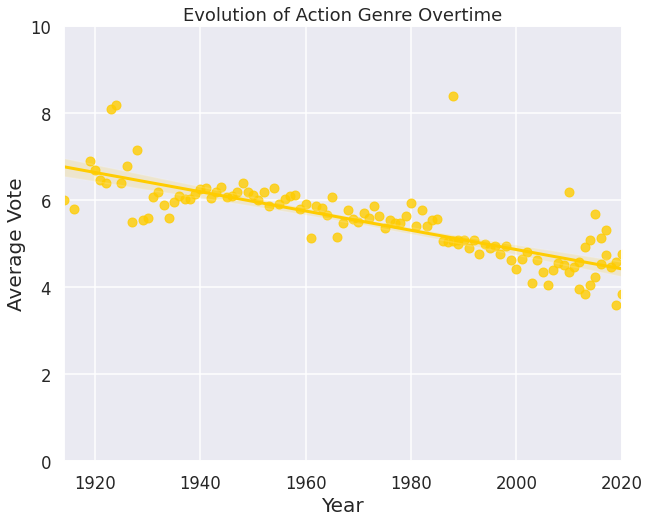

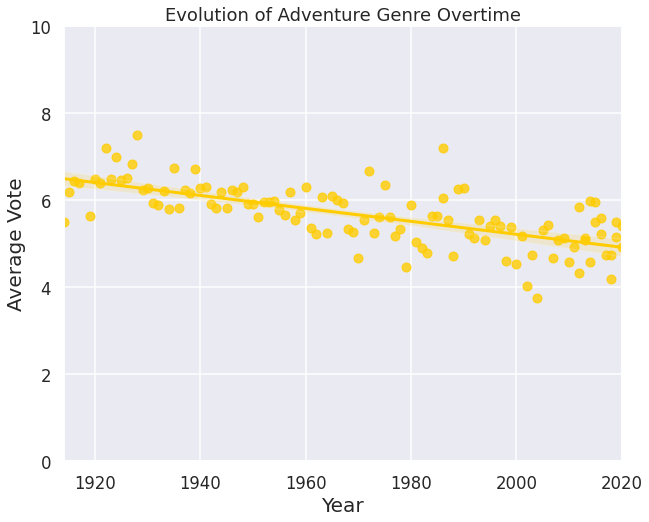

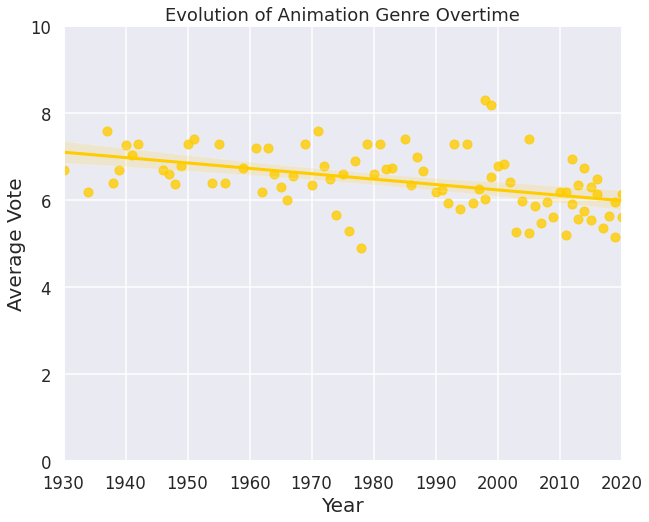

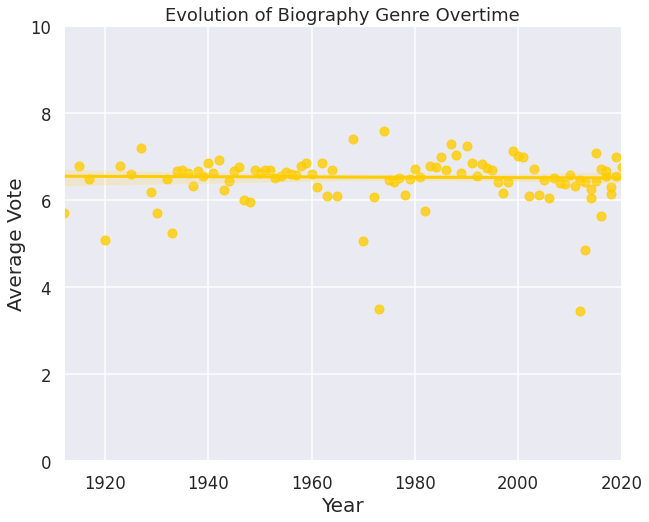

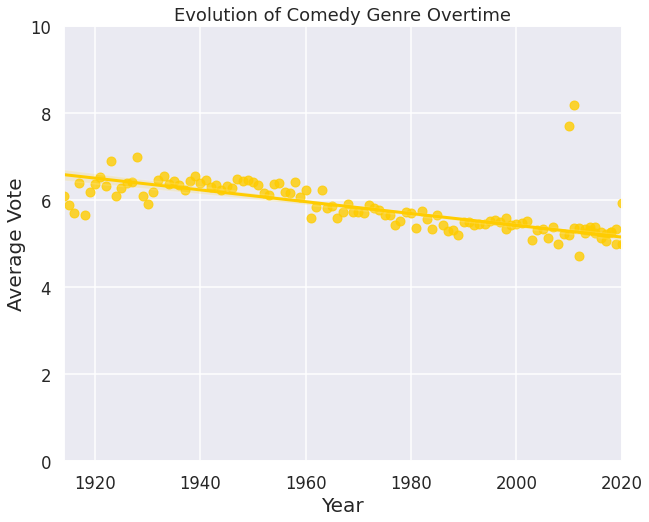

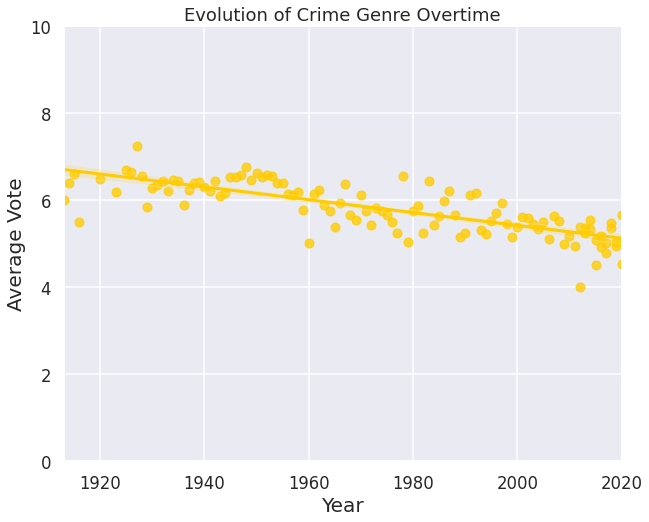

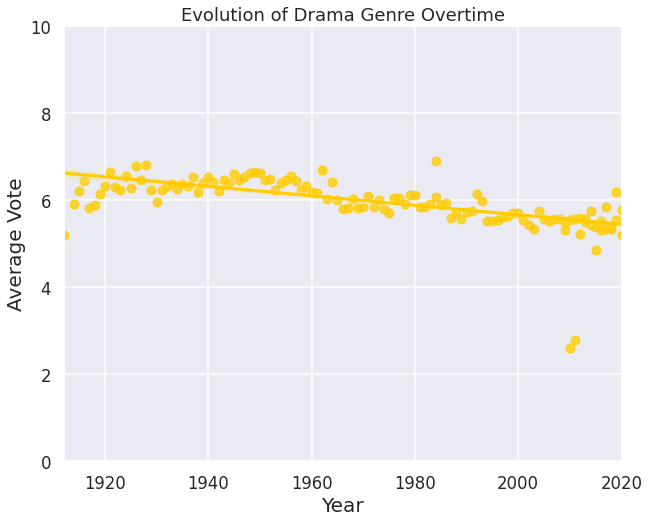

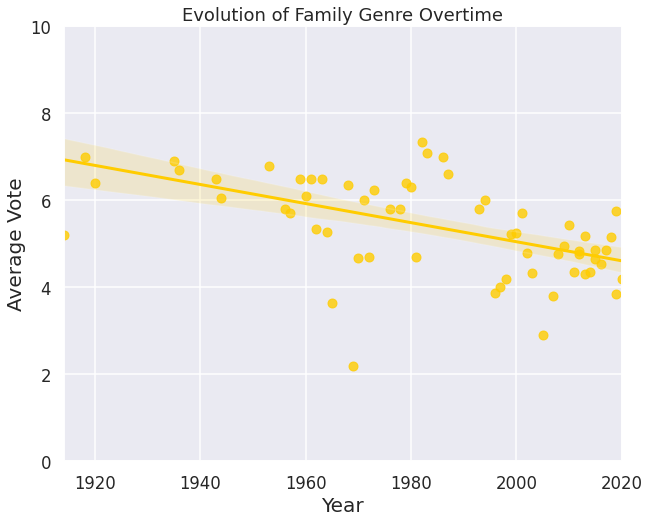

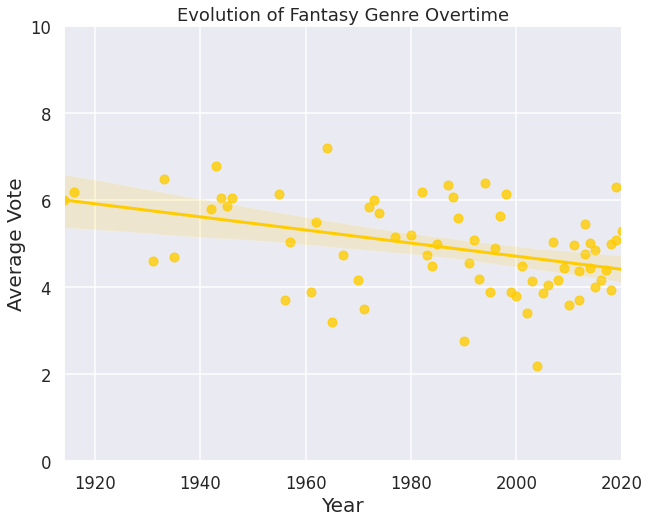

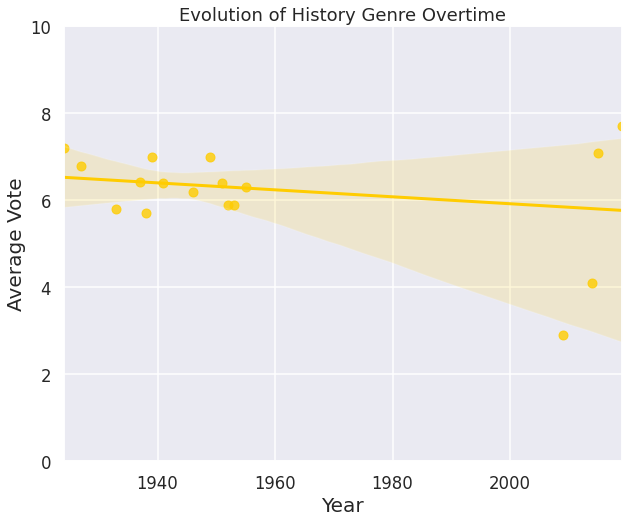

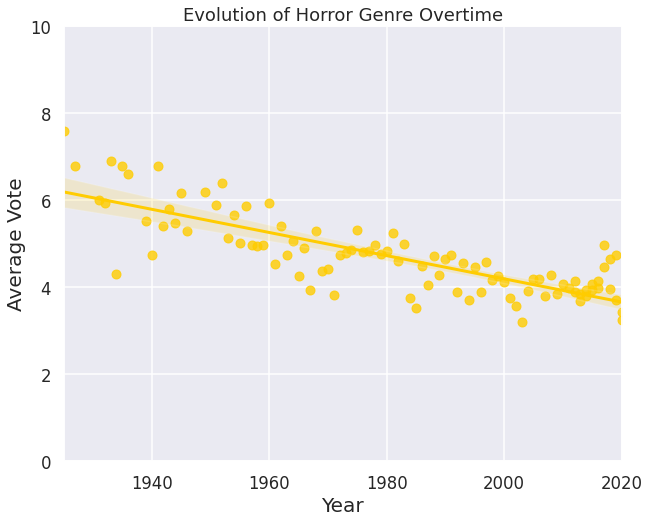

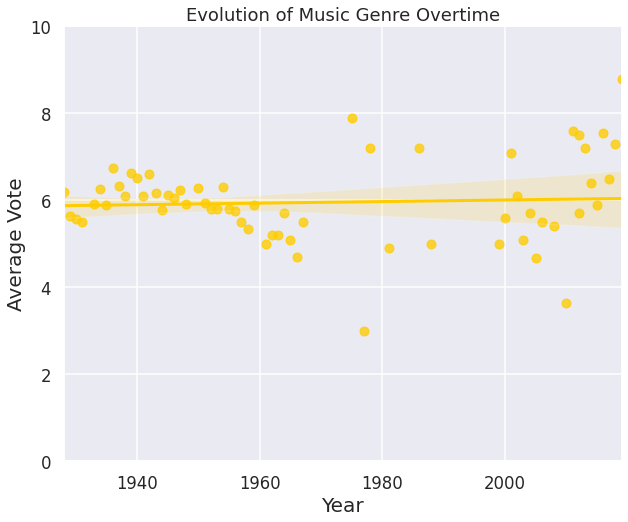

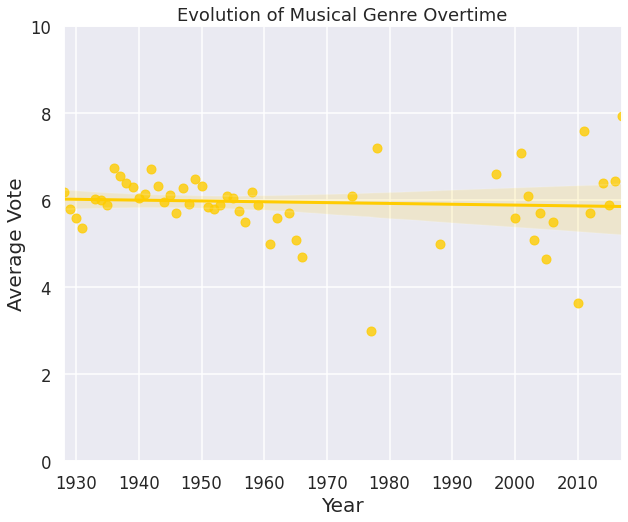

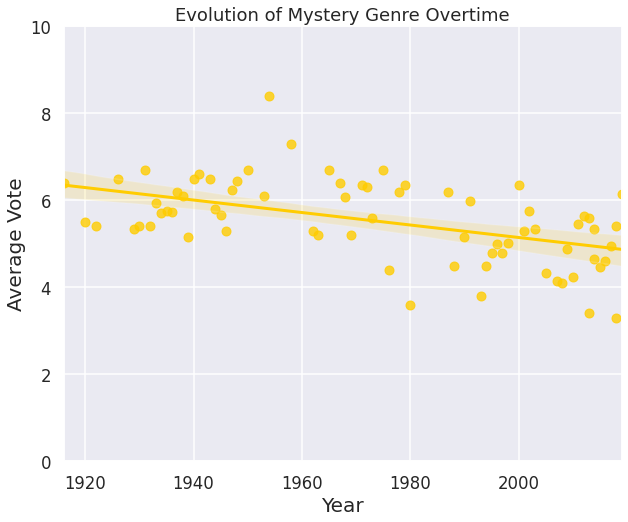

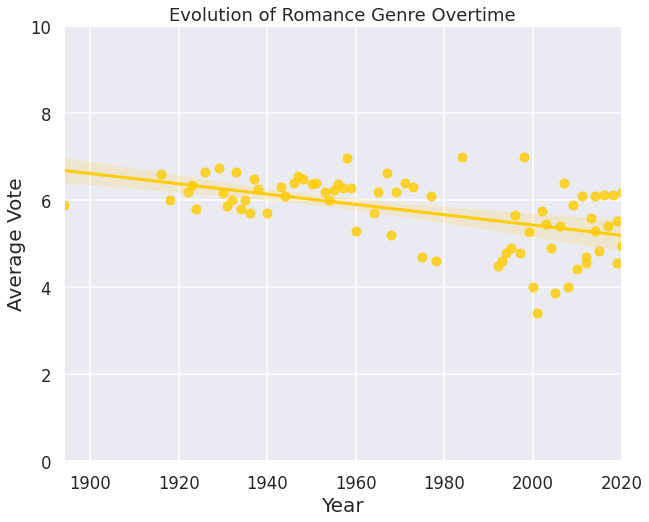

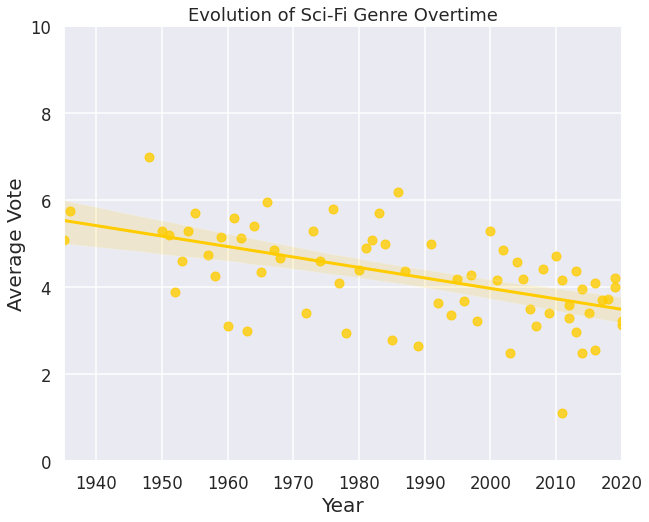

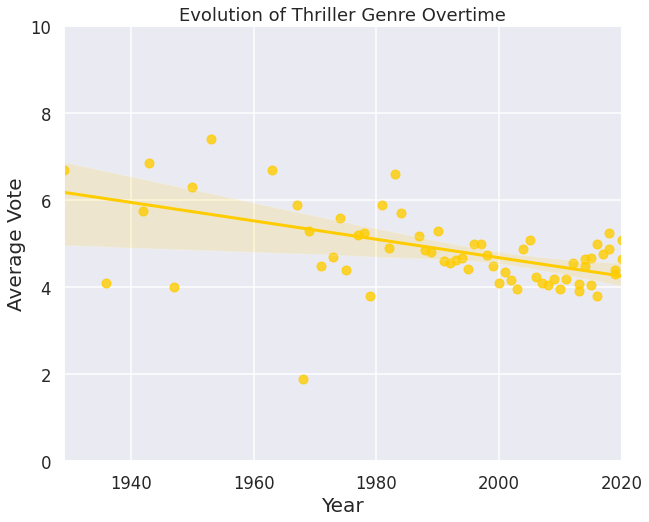

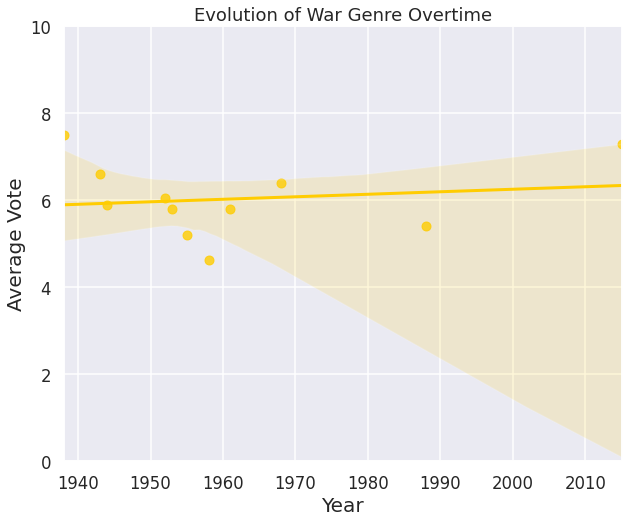

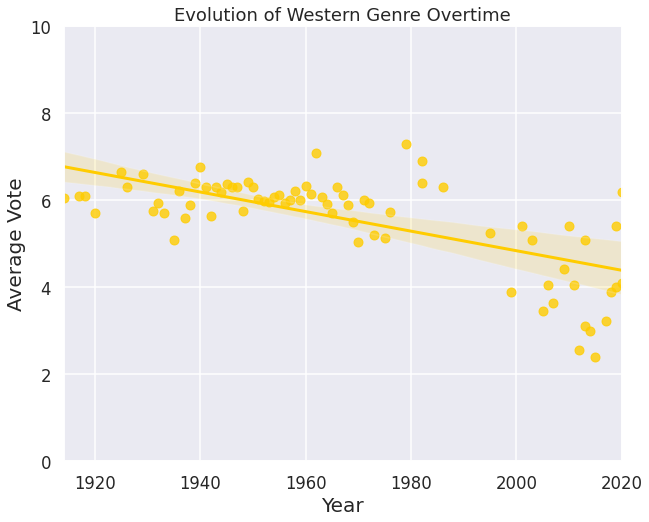

In [ ]:
list1=[df_action,df_adv,df_anim,df_biography,df_comedy,df_crime,df_drama,df_family,df_fantasy,df_history,df_horror,df_music,df_musical,df_mystery,df_romance,df_scifi,df_thriller,df_war,df_western]
for datafr in list1:
  fig,ax = plt.subplots(figsize=(10,8))
  datafr['year'].astype('int64')
  grouped_by_year=datafr.groupby('year')
  grouped_by_mean= grouped_by_year.mean()
  x=grouped_by_mean.reset_index()['year'].astype('int64')
  y=grouped_by_mean['avg_vote']


  sns.set_context("talk", rc={"lines.linewidth": 2})

  p=sns.regplot(x=x,y=y, data=grouped_by_mean.reset_index(),ax=ax,color='#ffcc00',robust=True)
  p.set_xlabel("Year",fontsize=20)
  p.set_ylabel("Average Vote",fontsize=20)
  p.set_title("Evolution of {} Genre Overtime".format(datafr.groupby('genre').mean().index[0]))
  
  plt.ylim(0, 10)
  plt.show()
  sns.set_style(style='darkgrid')

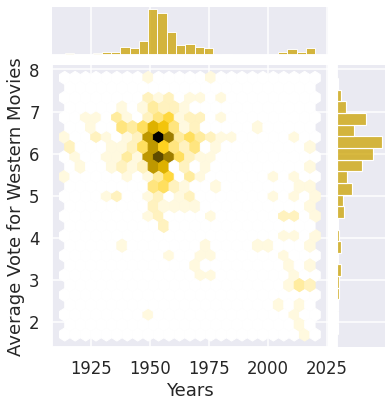

In [ ]:
g0=sns.jointplot(x=df_western['year'].astype('int64'),y=df_western['avg_vote'],kind="hex", color="#cca300")
g0.set_axis_labels('Years','Average Vote for Western Movies')
sns.set_style(style=None)

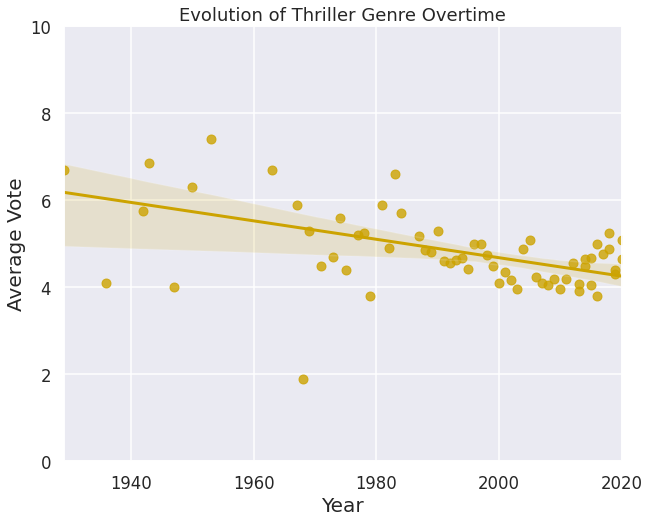

In [ ]:
  fig,ax = plt.subplots(figsize=(10,8))
  df_thriller['year'].astype('int64')
  grouped_by_year=df_thriller.groupby('year')
  grouped_by_mean= grouped_by_year.mean()
  x=grouped_by_mean.reset_index()['year'].astype('int64')
  y=grouped_by_mean['avg_vote']
  
  p=sns.regplot(x=x,y=y, data=grouped_by_mean.reset_index(),ax=ax,color='#cca300',robust=True)
  p.set_xlabel("Year",fontsize=20)
  p.set_ylabel("Average Vote",fontsize=20)
  p.set_title("Evolution of Thriller Genre Overtime")
  plt.ylim(0, 10)
  sns.set_style(style='darkgrid')

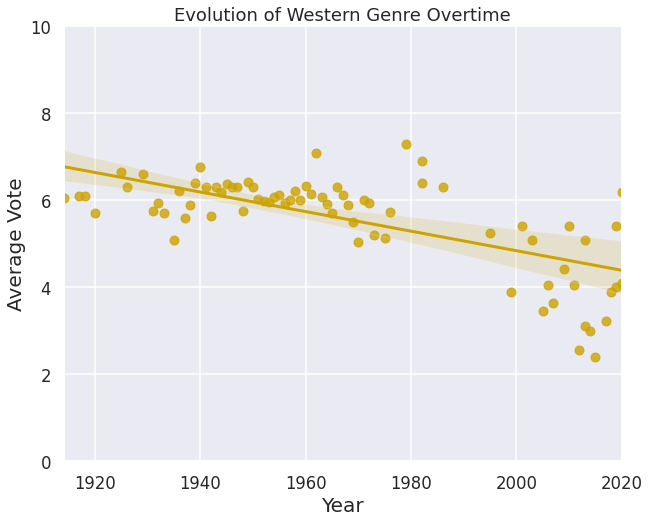

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
df_western['year'].astype('int64')
grouped_by_year=df_western.groupby('year')
grouped_by_mean= grouped_by_year.mean()
x=grouped_by_mean.reset_index()['year'].astype('int64')
y=grouped_by_mean['avg_vote']
  
p=sns.regplot(x=x,y=y, data=grouped_by_mean.reset_index(),ax=ax,color='#cca300',robust=True)
p.set_xlabel("Year",fontsize=20)
p.set_ylabel("Average Vote",fontsize=20)
p.set_title("Evolution of Western Genre Overtime")

plt.ylim(0, 10)
sns.set_style(style='darkgrid')

## Concordanța dintre opiniile publicului și al criticilor

In [ ]:
user_media_action = genre_action['reviews_from_users'].mean()
critics_media_action = genre_action['reviews_from_critics'].mean()
dif_action = user_media_action - critics_media_action

In [ ]:
user_media_adventure = genre_adventure['reviews_from_users'].mean()
critics_media_adventure = genre_adventure['reviews_from_critics'].mean()
dif_adventure = user_media_adventure - critics_media_adventure

In [ ]:
user_media_animation = genre_animation['reviews_from_users'].mean()
critics_media_animation = genre_animation['reviews_from_critics'].mean()
dif_animation = user_media_animation - critics_media_animation

In [ ]:
user_media_biography = genre_biography['reviews_from_users'].mean()
critics_media_biography = genre_biography['reviews_from_critics'].mean()
dif_biography = user_media_biography - critics_media_biography

In [ ]:
user_media_comedy = genre_comedy['reviews_from_users'].mean()
critics_media_comedy = genre_comedy['reviews_from_critics'].mean()
dif_comedy = user_media_comedy - critics_media_comedy

In [ ]:
user_media_crime = genre_crime['reviews_from_users'].mean()
critics_media_crime = genre_crime['reviews_from_critics'].mean()
dif_crime = user_media_crime - critics_media_crime

In [ ]:
user_media_drama = genre_drama['reviews_from_users'].mean()
critics_media_drama = genre_drama['reviews_from_critics'].mean()
dif_drama = user_media_drama - critics_media_drama

In [ ]:
user_media_family = genre_family['reviews_from_users'].mean()
critics_media_family = genre_family['reviews_from_critics'].mean()
dif_family = user_media_family - critics_media_family

In [ ]:
user_media_fantasy = genre_fantasy['reviews_from_users'].mean()
critics_media_fantasy = genre_fantasy['reviews_from_critics'].mean()
dif_fantasy = user_media_fantasy - critics_media_fantasy

In [ ]:
user_media_history = genre_history['reviews_from_users'].mean()
critics_media_history = genre_history['reviews_from_critics'].mean()
dif_history = user_media_history - critics_media_history

In [ ]:
user_media_horror = genre_horror['reviews_from_users'].mean()
critics_media_horror = genre_horror['reviews_from_critics'].mean()
dif_horror = user_media_horror - critics_media_horror

In [ ]:
user_media_music = genre_music['reviews_from_users'].mean()
critics_media_music = genre_music['reviews_from_critics'].mean()
dif_music = user_media_music - critics_media_music

In [ ]:
user_media_musical = genre_musical['reviews_from_users'].mean()
critics_media_musical = genre_musical['reviews_from_critics'].mean()
dif_musical = user_media_musical - critics_media_musical

In [ ]:
user_media_mystery = genre_mystery['reviews_from_users'].mean()
critics_media_mystery = genre_mystery['reviews_from_critics'].mean()
dif_mystery = user_media_mystery - critics_media_mystery

In [ ]:
user_media_romance = genre_romance['reviews_from_users'].mean()
critics_media_romance = genre_romance['reviews_from_critics'].mean()
dif_romance = user_media_romance - critics_media_romance

In [ ]:
user_media_sf = genre_sf['reviews_from_users'].mean()
critics_media_sf = genre_sf['reviews_from_critics'].mean()
dif_sf = user_media_sf - critics_media_sf

In [ ]:
user_media_sport = genre_sport['reviews_from_users'].mean()
critics_media_sport = genre_sport['reviews_from_critics'].mean()
dif_sport = user_media_sport - critics_media_sport

In [ ]:
user_media_thriller = genre_thriller['reviews_from_users'].mean()
critics_media_thriller = genre_thriller['reviews_from_critics'].mean()
dif_thriller = user_media_thriller - critics_media_thriller

In [ ]:
user_media_war = genre_war['reviews_from_users'].mean()
critics_media_war = genre_war['reviews_from_critics'].mean()
dif_war = user_media_war - critics_media_war

In [ ]:
user_media_western = genre_western['reviews_from_users'].mean()
critics_media_western = genre_western['reviews_from_critics'].mean()
dif_western = user_media_western - critics_media_western

In [ ]:
dif_review = pd.DataFrame({'genre':['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], 'diference':[dif_action, dif_adventure, dif_animation, dif_biography, dif_comedy, dif_crime, dif_drama, dif_family, dif_fantasy, dif_history, dif_horror, dif_music, dif_musical, dif_mystery, dif_romance, dif_sf, dif_sport, dif_thriller, dif_war, dif_western]})
dif_review = dif_review.sort_values(by='diference',ascending=True)
dif_review = dif_review.dropna(subset=['diference'])

Diferența dintre media review-urilor de la user-i și de la critici:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


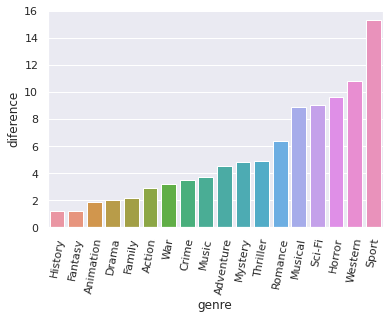

In [ ]:
bar_plot = sns.barplot(dif_review['genre'], dif_review['diference'])
for item in bar_plot.get_xticklabels():
    item.set_rotation(80)

In [ ]:
action = critics_media_action - user_media_action
adventure = critics_media_adventure - user_media_adventure
animation = critics_media_animation - user_media_animation
biography = critics_media_biography - user_media_biography
comedy = critics_media_comedy - user_media_comedy
crime = critics_media_crime - user_media_crime
drama = critics_media_drama - user_media_drama
family = critics_media_family - user_media_family
fantasy = critics_media_fantasy - user_media_fantasy
history = critics_media_history - user_media_history
horror = critics_media_horror - user_media_horror
music = critics_media_music - user_media_music
musical = critics_media_musical - user_media_musical
mystery = critics_media_mystery - user_media_mystery
romance = critics_media_romance - user_media_romance
sf = critics_media_sf - user_media_sf
sport = critics_media_sport - user_media_sport
thriller = critics_media_thriller - user_media_thriller
war = critics_media_war - user_media_war
western = critics_media_western - user_media_western

review = pd.DataFrame({'genre':['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], 'diference':[action, adventure, animation, biography, comedy, crime, drama, family, fantasy, history, horror, music, musical, mystery, romance, sf, sport, thriller, war, western]})
review = review.sort_values(by='diference',ascending=True)
review = review.dropna(subset=['diference'])
review

,genre,diference
16,Sport,-15.300000
19,Western,-10.829044
10,Horror,-9.654597
15,Sci-Fi,-9.013453
12,Musical,-8.878049
14,Romance,-6.353448
17,Thriller,-4.882178
13,Mystery,-4.849558
1,Adventure,-4.513089
11,Music,-3.681818


In [ ]:
Diferența dintre media review-urilor de la și de la user-i:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


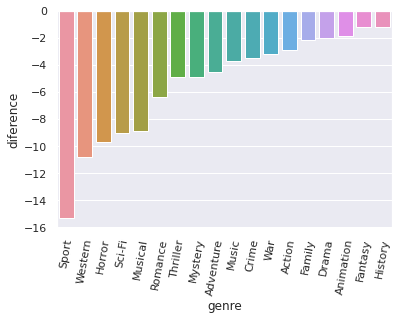

In [ ]:
bar_plot = sns.barplot(review['genre'], review['diference'])
for item in bar_plot.get_xticklabels():
    item.set_rotation(80)

## Scorul de încredere pentru evaluările fiecărui gen

>  Fiecare dintre noi, când intră pe site-ul **IMDb.com** la un film, primul lucru pe care îl vede este scorul de la 1 la 10. Însă cât de veridic este acel scor? Răspunsul la această întrebare îl putem afla doar orientându-ne după numărul de persoane ce au votat. Din acest motiv, astăzi vom prezenta niște vizualizări ce vor determina *în medie scorul cărui gen de filme este mai aproape de adevăr*.




**Prima ipoteză:** Dacă votează mai mulți oameni, înseamnă că va fi și un scor mai bun?

In [ ]:
#fac noi data frame-uri pentru fiecare gen din 42? 
#de exemplu la fantasy: 
                       #1 din genre_English scoatem coloanele country si language si definim ca genre_df
                          #  genre_df = genre_English.loc[:,['genre']]
                          #  print(genre_df)
                       #2 din genre_df selectam doar randurile care contin stringul fantasy (principalul sa se vada indexul la rand)
                          #  genre_fantasy = genre_df.loc[genre_df['genre'].isin(['Fantasy'])]
                          #  print(genre_fantasy)
#este vreo metoda sa facem pasii astia deodata pentru toate cele 42 de genuri?

In [ ]:
#din genre_English scoatem coloanele country si language si definim ca genre_df
genre_df = genre_English.loc[:,['genre', 'avg_vote', 'votes']]
print(genre_df)

                              genre  avg_vote  votes
3                    Drama, History       5.2    446
5                  Biography, Drama       5.7    484
17                            Drama       5.8    187
19                     Crime, Drama       6.0    552
22             Crime, Drama, Horror       6.4   1105
...                             ...       ...    ...
85812                        Horror       2.3    174
85830                Action, Comedy       3.5    326
85837         Action, Crime, Horror       6.1   4178
85838  Animation, Adventure, Family       5.7    442
85839                Action, Comedy       5.1  10627

[24831 rows x 3 columns]


In [ ]:
#1 din genre_df selectam doar randurile care contin stringul Action
genre_Action = genre_df.loc[genre_df['genre'].isin(['Action'])]
print(genre_Action)

        genre  avg_vote  votes
4279   Action       6.8    137
13370  Action       5.1    259
15346  Action       3.3    284
15564  Action       4.4    124
16510  Action       3.9    588
...       ...       ...    ...
83544  Action       3.2    162
84221  Action       5.4    545
84525  Action       4.2    488
85026  Action       3.1    217
85773  Action       4.8   2357

[173 rows x 3 columns]


In [ ]:
#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Action))

Rows: 173


In [ ]:
#facem o lista cu toate average votes din acest data frame
avg_vote_Action = genre_Action['avg_vote'].tolist()
print(avg_vote_Action)

[6.8, 5.1, 3.3, 4.4, 3.9, 6.0, 5.1, 4.1, 5.4, 4.3, 3.9, 5.3, 3.9, 2.8, 5.7, 4.4, 4.2, 4.6, 4.2, 5.1, 4.7, 5.0, 5.5, 4.0, 4.1, 4.2, 6.2, 4.2, 5.2, 4.7, 5.2, 3.8, 3.5, 4.8, 4.0, 5.4, 5.1, 5.4, 5.4, 4.9, 4.2, 5.2, 5.6, 6.4, 5.1, 5.3, 4.8, 4.2, 3.9, 4.8, 4.8, 4.3, 4.4, 5.1, 4.0, 3.8, 4.9, 4.2, 4.7, 4.0, 4.4, 4.8, 5.3, 5.1, 3.1, 5.1, 4.1, 5.6, 4.8, 3.9, 2.3, 2.6, 4.6, 3.2, 3.0, 3.6, 3.5, 3.0, 3.6, 4.0, 5.4, 4.4, 3.3, 3.5, 6.2, 5.1, 3.9, 2.9, 4.3, 1.9, 4.5, 4.9, 7.1, 3.6, 3.6, 4.0, 4.0, 4.1, 6.1, 3.8, 2.4, 1.7, 5.7, 3.5, 2.9, 5.0, 2.6, 3.2, 4.2, 2.9, 3.9, 3.3, 2.6, 2.2, 3.5, 5.7, 3.6, 2.8, 3.4, 6.7, 6.0, 6.6, 5.2, 3.7, 3.4, 4.4, 2.9, 4.8, 4.2, 4.1, 2.9, 2.6, 2.8, 3.0, 4.3, 3.2, 4.6, 2.9, 4.6, 3.5, 5.0, 4.8, 7.3, 3.8, 4.1, 5.8, 3.7, 2.4, 5.1, 5.9, 4.5, 4.1, 6.6, 2.7, 3.6, 2.8, 3.8, 3.8, 5.3, 3.6, 7.8, 2.2, 3.4, 6.3, 6.0, 3.0, 2.4, 3.1, 3.2, 5.4, 4.2, 3.1, 4.8]


In [ ]:
#aflam media la average votes din acest data frame
def Average_avg_vote_Action(avg_vote_Action):
    return sum(avg_vote_Action) / len(avg_vote_Action)
average = Average_avg_vote_Action(avg_vote_Action)
print("Average of the average of votes of Action genre =", round(average, 2))

Average of the average of votes of Action genre = 4.29


In [ ]:
#facem o lista cu toate votes din acest data frame
votes_Action = genre_Action['votes'].tolist()
print(votes_Action)

[137, 259, 284, 124, 588, 1587, 2768, 105, 350, 260, 215, 114, 408, 315, 614, 268, 118, 101, 133, 1213, 179, 217, 159, 657, 126, 102, 118, 912, 466, 880, 511, 172, 181, 116, 185, 533, 291, 1111, 1011, 1757, 152, 327, 393, 361, 222, 876, 239, 721, 135, 234, 554, 126, 1364, 266, 256, 133, 120, 344, 183, 444, 239, 113, 548, 117, 589, 185, 175, 347, 313, 218, 525, 383, 103, 192, 608, 176, 331, 114, 224, 101, 117, 361, 226, 210, 152, 101, 501, 114, 151, 230, 1070, 102, 228, 784, 246, 403, 8510, 253, 238, 100, 239, 181, 1219, 122, 164, 188, 239, 193, 121, 185, 406, 181, 295, 212, 150, 560, 5046, 167, 633, 143, 195, 1190, 469, 157, 214, 183, 144, 115, 105, 918, 789, 105, 595, 117, 437, 715, 1584, 115, 829, 189, 1001, 134, 474, 254, 118, 113, 284, 1626, 2627, 175, 283, 893, 830, 969, 200, 756, 957, 352, 105, 1373, 262, 158, 223, 298, 244, 725, 145, 337, 162, 545, 488, 217, 2357]


In [ ]:
#aflam media la votes din acest data frame
def Average_votes_Action(votes_Action):
    return sum(votes_Action) / len(votes_Action)
average = Average_votes_Action(votes_Action)
print("Average of the number of votes of Action genre =", round(average, 2))

Average of the number of votes of Action genre = 498.77


In [ ]:
#2 din genre_df selectam doar randurile care contin stringul Adventure
genre_Adventure = genre_df.loc[genre_df['genre'].isin(['Adventure'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Adventure))

#facem o lista cu toate average votes din acest data frame
avg_vote_Adventure = genre_Adventure['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Adventure(avg_vote_Adventure):
    return sum(avg_vote_Adventure) / len(avg_vote_Adventure)
average = Average_avg_vote_Adventure(avg_vote_Adventure)
print("Average of the average of votes of Adventure genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Adventure = genre_Adventure['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Adventure(votes_Adventure):
    return sum(votes_Adventure) / len(votes_Adventure)
average = Average_votes_Adventure(votes_Adventure)
print("Average of the number of votes of Adventure genre =", round(average, 2))

Rows: 95
Average of the average of votes of Adventure genre = 5.09
Average of the number of votes of Adventure genre = 332.47


In [ ]:
#3 din genre_df selectam doar randurile care contin stringul Animation
genre_Animation = genre_df.loc[genre_df['genre'].isin(['Animation'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Animation))

#facem o lista cu toate average votes din acest data frame
avg_vote_Animation = genre_Animation['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Animation(avg_vote_Animation):
    return sum(avg_vote_Animation) / len(avg_vote_Animation)
average = Average_avg_vote_Animation(avg_vote_Animation)
print("Average of the average of votes of Animation genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Animation = genre_Animation['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Animation(votes_Animation):
    return sum(votes_Animation) / len(votes_Animation)
average = Average_votes_Animation(votes_Animation)
print("Average of the number of votes of Animation genre =", round(average, 2))

Rows: 21
Average of the average of votes of Animation genre = 5.06
Average of the number of votes of Animation genre = 289.9


In [ ]:
#4 din genre_df selectam doar randurile care contin stringul Biography
genre_Biography = genre_df.loc[genre_df['genre'].isin(['Biography'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Biography))

#facem o lista cu toate average votes din acest data frame
avg_vote_Biography = genre_Biography['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Biography(avg_vote_Biography):
    return sum(avg_vote_Biography) / len(avg_vote_Biography)
average = Average_avg_vote_Biography(avg_vote_Biography)
print("Average of the average of votes of Biography genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Biography = genre_Biography['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Biography(votes_Biography):
    return sum(votes_Biography) / len(votes_Biography)
average = Average_votes_Biography(votes_Biography)
print("Average of the number of votes of Biography genre =", round(average, 2))

Rows: 8
Average of the average of votes of Biography genre = 5.92
Average of the number of votes of Biography genre = 357.25


In [ ]:
#5 din genre_df selectam doar randurile care contin stringul Comedy
genre_Comedy = genre_df.loc[genre_df['genre'].isin(['Comedy'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Comedy))

#facem o lista cu toate average votes din acest data frame
avg_vote_Comedy = genre_Comedy['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Comedy(avg_vote_Comedy):
    return sum(avg_vote_Comedy) / len(avg_vote_Comedy)
average = Average_avg_vote_Comedy(avg_vote_Comedy)
print("Average of the average of votes of Comedy genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Comedy = genre_Comedy['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Comedy(votes_Comedy):
    return sum(votes_Comedy) / len(votes_Comedy)
average = Average_votes_Comedy(votes_Comedy)
print("Average of the number of votes of Comedy genre =", round(average, 2))

Rows: 1795
Average of the average of votes of Comedy genre = 5.33
Average of the number of votes of Comedy genre = 5727.19


In [ ]:
#6 din genre_df selectam doar randurile care contin stringul Crime
genre_Crime = genre_df.loc[genre_df['genre'].isin(['Crime'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Crime))

#facem o lista cu toate average votes din acest data frame
avg_vote_Crime = genre_Crime['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Crime(avg_vote_Crime):
    return sum(avg_vote_Crime) / len(avg_vote_Crime)
average = Average_avg_vote_Crime(avg_vote_Crime)
print("Average of the average of votes of Crime genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Crime = genre_Crime['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Crime(votes_Crime):
    return sum(votes_Crime) / len(votes_Crime)
average = Average_votes_Crime(votes_Crime)
print("Average of the number of votes of Crime genre =", round(average, 2))

Rows: 25
Average of the average of votes of Crime genre = 4.87
Average of the number of votes of Crime genre = 325.36


In [ ]:
#7 din genre_df selectam doar randurile care contin stringul Drama
genre_Drama = genre_df.loc[genre_df['genre'].isin(['Drama'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Drama))

#facem o lista cu toate average votes din acest data frame
avg_vote_Drama = genre_Drama['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Drama(avg_vote_Drama):
    return sum(avg_vote_Drama) / len(avg_vote_Drama)
average = Average_avg_vote_Drama(avg_vote_Drama)
print("Average of the average of votes of Drama genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Drama = genre_Drama['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Drama(votes_Drama):
    return sum(votes_Drama) / len(votes_Drama)
average = Average_votes_Drama(votes_Drama)
print("Average of the number of votes of Drama genre =", round(average, 2))

Rows: 2274
Average of the average of votes of Drama genre = 5.89
Average of the number of votes of Drama genre = 5930.77


In [ ]:
#8 din genre_df selectam doar randurile care contin stringul Family
genre_Family = genre_df.loc[genre_df['genre'].isin(['Family'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Family))

#facem o lista cu toate average votes din acest data frame
avg_vote_Family = genre_Family['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Family(avg_vote_Family):
    return sum(avg_vote_Family) / len(avg_vote_Family)
average = Average_avg_vote_Family(avg_vote_Family)
print("Average of the average of votes of Family genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Family = genre_Family['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Family(votes_Family):
    return sum(votes_Family) / len(votes_Family)
average = Average_votes_Family(votes_Family)
print("Average of the number of votes of Family genre =", round(average, 2))

Rows: 79
Average of the average of votes of Family genre = 4.75
Average of the number of votes of Family genre = 245.97


In [ ]:
#9 din genre_df selectam doar randurile care contin stringul Fantasy
genre_Fantasy = genre_df.loc[genre_df['genre'].isin(['Fantasy'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Fantasy))

#facem o lista cu toate average votes din acest data frame
avg_vote_Fantasy = genre_Fantasy['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Fantasy(avg_vote_Fantasy):
    return sum(avg_vote_Fantasy) / len(avg_vote_Fantasy)
average = Average_avg_vote_Fantasy(avg_vote_Fantasy)
print("Average of the average of votes of Fantasy genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Fantasy = genre_Fantasy['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Fantasy(votes_Fantasy):
    return sum(votes_Fantasy) / len(votes_Fantasy)
average = Average_votes_Fantasy(votes_Fantasy)
print("Average of the number of votes of Fantasy genre =", round(average, 2))

Rows: 24
Average of the average of votes of Fantasy genre = 4.66
Average of the number of votes of Fantasy genre = 717.42


In [ ]:
#10 din genre_df selectam doar randurile care contin stringul History
genre_History = genre_df.loc[genre_df['genre'].isin(['History'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_History))

#facem o lista cu toate average votes din acest data frame
avg_vote_History = genre_History['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_History(avg_vote_History):
    return sum(avg_vote_History) / len(avg_vote_History)
average = Average_avg_vote_History(avg_vote_History)
print("Average of the average of votes of History genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_History = genre_History['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_History(votes_History):
    return sum(votes_History) / len(votes_History)
average = Average_votes_History(votes_History)
print("Average of the number of votes of History genre =", round(average, 2))

Rows: 3
Average of the average of votes of History genre = 7.27
Average of the number of votes of History genre = 214.0


In [ ]:
#11 din genre_df selectam doar randurile care contin stringul Horror
genre_Horror = genre_df.loc[genre_df['genre'].isin(['Horror'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Horror))

#facem o lista cu toate average votes din acest data frame
avg_vote_Horror = genre_Horror['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Horror(avg_vote_Horror):
    return sum(avg_vote_Horror) / len(avg_vote_Horror)
average = Average_avg_vote_Horror(avg_vote_Horror)
print("Average of the average of votes of Horror genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Horror = genre_Horror['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Horror(votes_Horror):
    return sum(votes_Horror) / len(votes_Horror)
average = Average_votes_Horror(votes_Horror)
print("Average of the number of votes of Horror genre =", round(average, 2))

Rows: 1052
Average of the average of votes of Horror genre = 3.96
Average of the number of votes of Horror genre = 2352.04


In [ ]:
#12 din genre_df selectam doar randurile care contin stringul Music
genre_Music = genre_df.loc[genre_df['genre'].isin(['Music'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Music))

#facem o lista cu toate average votes din acest data frame
avg_vote_Music = genre_Music['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Music(avg_vote_Music):
    return sum(avg_vote_Music) / len(avg_vote_Music)
average = Average_avg_vote_Music(avg_vote_Music)
print("Average of the average of votes of Music genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Music = genre_Music['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Music(votes_Music):
    return sum(votes_Music) / len(votes_Music)
average = Average_votes_Music(votes_Music)
print("Average of the number of votes of Music genre =", round(average, 2))

Rows: 12
Average of the average of votes of Music genre = 6.03
Average of the number of votes of Music genre = 1649.5


In [ ]:
#13 din genre_df selectam doar randurile care contin stringul Musical
genre_Musical = genre_df.loc[genre_df['genre'].isin(['Musical'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Musical))

#facem o lista cu toate average votes din acest data frame
avg_vote_Musical = genre_Musical['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Musical(avg_vote_Musical):
    return sum(avg_vote_Musical) / len(avg_vote_Musical)
average = Average_avg_vote_Musical(avg_vote_Musical)
print("Average of the average of votes of Musical genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Musical = genre_Musical['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Musical(votes_Musical):
    return sum(votes_Musical) / len(votes_Musical)
average = Average_votes_Musical(votes_Musical)
print("Average of the number of votes of Musical genre =", round(average, 2))

Rows: 58
Average of the average of votes of Musical genre = 6.04
Average of the number of votes of Musical genre = 310.17


In [ ]:
#14 din genre_df selectam doar randurile care contin stringul Mystery
genre_Mystery = genre_df.loc[genre_df['genre'].isin(['Mystery'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Mystery))

#facem o lista cu toate average votes din acest data frame
avg_vote_Mystery = genre_Mystery['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Mystery(avg_vote_Mystery):
    return sum(avg_vote_Mystery) / len(avg_vote_Mystery)
average = Average_avg_vote_Mystery(avg_vote_Mystery)
print("Average of the average of votes of Mystery genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Mystery = genre_Mystery['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Mystery(votes_Mystery):
    return sum(votes_Mystery) / len(votes_Mystery)
average = Average_votes_Mystery(votes_Mystery)
print("Average of the number of votes of Mystery genre =", round(average, 2))

Rows: 60
Average of the average of votes of Mystery genre = 5.52
Average of the number of votes of Mystery genre = 291.85


In [ ]:
#15 din genre_df selectam doar randurile care contin stringul Romance
genre_Romance = genre_df.loc[genre_df['genre'].isin(['Romance'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Romance))

#facem o lista cu toate average votes din acest data frame
avg_vote_Romance = genre_Romance['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Romance(avg_vote_Romance):
    return sum(avg_vote_Romance) / len(avg_vote_Romance)
average = Average_avg_vote_Romance(avg_vote_Romance)
print("Average of the average of votes of Romance genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Romance = genre_Romance['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Romance(votes_Romance):
    return sum(votes_Romance) / len(votes_Romance)
average = Average_votes_Romance(votes_Romance)
print("Average of the number of votes of Romance genre =", round(average, 2))

Rows: 47
Average of the average of votes of Romance genre = 5.4
Average of the number of votes of Romance genre = 453.26


In [ ]:
#16 din genre_df selectam doar randurile care contin stringul Sci_Fi
genre_Sci_Fi = genre_df.loc[genre_df['genre'].isin(['Sci-Fi'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Sci_Fi))

#facem o lista cu toate average votes din acest data frame
avg_vote_Sci_Fi = genre_Sci_Fi['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Sci_Fi(avg_vote_Sci_Fi):
    return sum(avg_vote_Sci_Fi) / len(avg_vote_Sci_Fi)
average = Average_avg_vote_Sci_Fi(avg_vote_Sci_Fi)
print("Average of the average of votes of Sci_Fi genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Sci_Fi = genre_Sci_Fi['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Sci_Fi(votes_Sci_Fi):
    return sum(votes_Sci_Fi) / len(votes_Sci_Fi)
average = Average_votes_Sci_Fi(votes_Sci_Fi)
print("Average of the number of votes of Sci_Fi genre =", round(average, 2))

Rows: 123
Average of the average of votes of Sci_Fi genre = 3.86
Average of the number of votes of Sci_Fi genre = 518.02


In [ ]:
#17 din genre_df selectam doar randurile care contin stringul Sport
genre_Sport = genre_df.loc[genre_df['genre'].isin(['Sport'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Sport))

#facem o lista cu toate average votes din acest data frame
avg_vote_Sport = genre_Sport['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Sport(avg_vote_Sport):
    return sum(avg_vote_Sport) / len(avg_vote_Sport)
average = Average_avg_vote_Sport(avg_vote_Sport)
print("Average of the average of votes of Sport genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Sport = genre_Sport['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Sport(votes_Sport):
    return sum(votes_Sport) / len(votes_Sport)
average = Average_votes_Sport(votes_Sport)
print("Average of the number of votes of Sport genre =", round(average, 2))

Rows: 6
Average of the average of votes of Sport genre = 5.85
Average of the number of votes of Sport genre = 388.0


In [ ]:
#18 din genre_df selectam doar randurile care contin stringul Thriller
genre_Thriller = genre_df.loc[genre_df['genre'].isin(['Thriller'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Thriller))

#facem o lista cu toate average votes din acest data frame
avg_vote_Thriller = genre_Thriller['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Thriller(avg_vote_Thriller):
    return sum(avg_vote_Thriller) / len(avg_vote_Thriller)
average = Average_avg_vote_Thriller(avg_vote_Thriller)
print("Average of the average of votes of Thriller genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Thriller = genre_Thriller['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Thriller(votes_Thriller):
    return sum(votes_Thriller) / len(votes_Thriller)
average = Average_votes_Thriller(votes_Thriller)
print("Average of the number of votes of Thriller genre =", round(average, 2))

Rows: 472
Average of the average of votes of Thriller genre = 4.55
Average of the number of votes of Thriller genre = 734.79


In [ ]:
#19 din genre_df selectam doar randurile care contin stringul War
genre_War = genre_df.loc[genre_df['genre'].isin(['War'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_War))

#facem o lista cu toate average votes din acest data frame
avg_vote_War = genre_War['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_War(avg_vote_War):
    return sum(avg_vote_War) / len(avg_vote_War)
average = Average_avg_vote_War(avg_vote_War)
print("Average of the average of votes of War genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_War = genre_War['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_War(votes_War):
    return sum(votes_War) / len(votes_War)
average = Average_votes_War(votes_War)
print("Average of the number of votes of War genre =", round(average, 2))

Rows: 4
Average of the average of votes of War genre = 5.8
Average of the number of votes of War genre = 146.5


In [ ]:
#20 din genre_df selectam doar randurile care contin stringul Western
genre_Western = genre_df.loc[genre_df['genre'].isin(['Western'])]

#aflam numarul de randuri din acest data frame
print('Rows:', len(genre_Western))

#facem o lista cu toate average votes din acest data frame
avg_vote_Western = genre_Western['avg_vote'].tolist()

#aflam media la average votes din acest data frame
def Average_avg_vote_Western(avg_vote_Western):
    return sum(avg_vote_Western) / len(avg_vote_Western)
average = Average_avg_vote_Western(avg_vote_Western)
print("Average of the average of votes of Western genre =", round(average, 2))

#facem o lista cu toate votes din acest data frame
votes_Western = genre_Western['votes'].tolist()

#aflam media la votes din acest data frame
def Average_votes_Western(votes_Western):
    return sum(votes_Western) / len(votes_Western)
average = Average_votes_Western(votes_Western)
print("Average of the number of votes of Western genre =", round(average, 2))

Rows: 388
Average of the average of votes of Western genre = 5.77
Average of the number of votes of Western genre = 665.65


In [ ]:
import matplotlib.pyplot as plt

from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


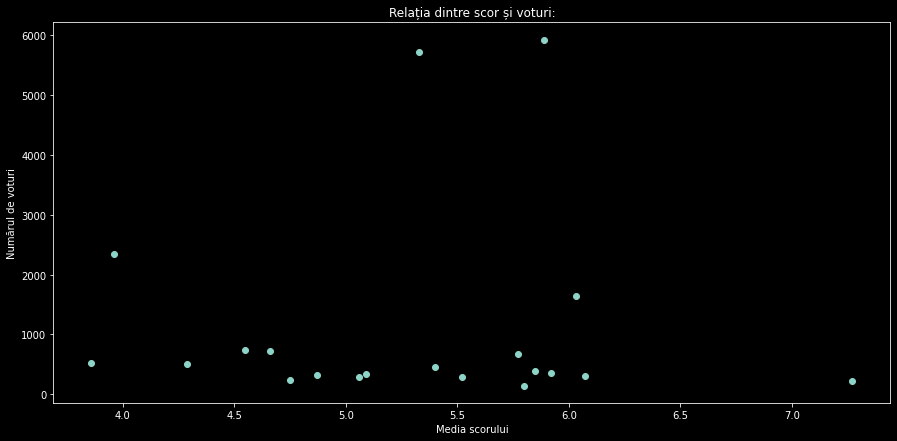

In [ ]:
import matplotlib.pyplot as plt
g_avg_votes = [4.29, 5.09, 5.06, 5.92, 5.33, 4.87, 5.89, 4.75, 4.66, 7.27, 3.96, 6.03, 6.07, 5.52, 5.40, 3.86, 5.85, 4.55, 5.80, 5.77]
g_nr_votes = [498.77, 332.47, 289.9, 357.25, 5727.19, 325.36, 5930.77, 245.97, 717.42, 214.00, 2352.04, 1649.5, 310.17, 291.85, 453.26, 518.02, 388.0, 734.79, 146.5, 665.65]
plt.figure(figsize = (15,7))
plt.scatter(g_avg_votes, g_nr_votes)
plt.style.use('dark_background')
plt.xlabel('Media scorului')
plt.ylabel('Numărul de voturi')
plt.title('Relația dintre scor și voturi:');

## Dependența duratei filmelor de gen

In [ ]:
genre_action = films.loc[films['genre'].isin(['Action'])]
genre_action

,duration,genre,reviews_from_users,reviews_from_critics
4279,261,Action,10.0,6.0
12404,88,Action,6.0,1.0
13370,86,Action,12.0,8.0
14010,98,Action,2.0,2.0
15313,100,Action,9.0,6.0
...,...,...,...,...
85367,164,Action,32.0,2.0
85386,80,Action,15.0,3.0
85535,94,Action,9.0,12.0
85723,110,Action,16.0,1.0


In [ ]:
genre_adventure = films.loc[films['genre'].isin(['Adventure'])]
genre_adventure

,duration,genre,reviews_from_users,reviews_from_critics
55,67,Adventure,3.0,5.0
221,104,Adventure,11.0,18.0
295,68,Adventure,14.0,5.0
773,223,Adventure,5.0,3.0
895,73,Adventure,11.0,7.0
...,...,...,...,...
81333,87,Adventure,31.0,7.0
81984,120,Adventure,8.0,2.0
83309,87,Adventure,1.0,4.0
84165,130,Adventure,8.0,2.0


In [ ]:
genre_animation = films.loc[films['genre'].isin(['Animation'])]
genre_animation

,duration,genre,reviews_from_users,reviews_from_critics
11105,66,Animation,7.0,6.0
14047,93,Animation,4.0,2.0
22941,100,Animation,15.0,3.0
31252,78,Animation,3.0,1.0
31724,84,Animation,5.0,10.0
36109,74,Animation,2.0,2.0
37008,72,Animation,4.0,1.0
37164,83,Animation,3.0,6.0
42798,80,Animation,2.0,1.0
42944,78,Animation,5.0,1.0


In [ ]:
genre_biography = films.loc[films['genre'].isin(['Biografy'])]
genre_biography

,duration,genre,reviews_from_users,reviews_from_critics


In [ ]:
genre_comedy = films.loc[films['genre'].isin(['Biografy'])]
genre_comedy

,duration,genre,reviews_from_users,reviews_from_critics


In [ ]:
genre_crime = films.loc[films['genre'].isin(['Crime'])]
genre_crime

,duration,genre,reviews_from_users,reviews_from_critics
698,91,Crime,19.0,12.0
1412,58,Crime,10.0,12.0
4983,77,Crime,1.0,1.0
8460,100,Crime,2.0,4.0
10229,78,Crime,27.0,9.0
...,...,...,...,...
82709,111,Crime,5.0,12.0
82923,103,Crime,23.0,2.0
82982,120,Crime,8.0,23.0
84081,127,Crime,1.0,3.0


In [ ]:
genre_documentary = films.loc[films['genre'].isin(['Documentary'])]
genre_documentary

,duration,genre,reviews_from_users,reviews_from_critics
85608,76,Documentary,2.0,7.0


In [ ]:
genre_drama = films.loc[films['genre'].isin(['Drama'])]
genre_drama

,duration,genre,reviews_from_users,reviews_from_critics
2,53,Drama,5.0,2.0
9,55,Drama,8.0,1.0
10,121,Drama,9.0,9.0
12,96,Drama,16.0,7.0
21,72,Drama,7.0,2.0
...,...,...,...,...
85804,94,Drama,2.0,10.0
85810,96,Drama,2.0,6.0
85831,85,Drama,4.0,21.0
85832,90,Drama,1.0,2.0


In [ ]:
genre_family = films.loc[films['genre'].isin(['Family'])]
genre_family

,duration,genre,reviews_from_users,reviews_from_critics
4817,75,Family,3.0,2.0
11892,108,Family,2.0,1.0
22388,87,Family,4.0,1.0
23372,85,Family,1.0,2.0
24831,76,Family,1.0,2.0
...,...,...,...,...
84953,102,Family,10.0,5.0
85140,119,Family,8.0,19.0
85322,90,Family,2.0,4.0
85572,89,Family,7.0,2.0


In [ ]:
genre_fantasy = films.loc[films['genre'].isin(['Fantasy'])]
genre_fantasy

,duration,genre,reviews_from_users,reviews_from_critics
973,55,Fantasy,34.0,47.0
1018,55,Fantasy,5.0,3.0
8756,87,Fantasy,27.0,10.0
10803,100,Fantasy,14.0,5.0
11174,76,Fantasy,8.0,14.0
12283,74,Fantasy,1.0,3.0
12620,97,Fantasy,5.0,2.0
12685,94,Fantasy,10.0,10.0
13447,79,Fantasy,4.0,10.0
13770,87,Fantasy,6.0,5.0


In [ ]:
genre_film_noir = films.loc[films['genre'].isin(['Film-Noir'])]
genre_film_noir

,duration,genre,reviews_from_users,reviews_from_critics


In [ ]:
genre_history = films.loc[films['genre'].isin(['History'])]
genre_history

,duration,genre,reviews_from_users,reviews_from_critics
3925,138,History,2.0,3.0
5804,125,History,2.0,1.0
6619,110,History,5.0,1.0
29806,109,History,5.0,2.0
57659,80,History,4.0,6.0
61157,110,History,1.0,15.0
72513,105,History,18.0,1.0
74088,139,History,6.0,4.0
80759,100,History,7.0,8.0
82619,120,History,1.0,10.0


In [ ]:
genre_horror = films.loc[films['genre'].isin(['Horror'])]
genre_horror

,duration,genre,reviews_from_users,reviews_from_critics
195,88,Horror,14.0,7.0
435,93,Horror,152.0,99.0
572,69,Horror,23.0,21.0
627,63,Horror,26.0,39.0
1475,69,Horror,180.0,94.0
...,...,...,...,...
85545,97,Horror,5.0,7.0
85594,89,Horror,20.0,12.0
85726,99,Horror,6.0,36.0
85812,77,Horror,14.0,3.0


In [ ]:
genre_music = films.loc[films['genre'].isin(['Music'])]
genre_music

,duration,genre,reviews_from_users,reviews_from_critics
8682,84,Music,10.0,5.0
9617,79,Music,11.0,1.0
11499,91,Music,13.0,1.0
15391,67,Music,8.0,7.0
16364,72,Music,8.0,6.0
17368,85,Music,8.0,4.0
19780,86,Music,4.0,3.0
31540,80,Music,2.0,4.0
31903,94,Music,9.0,4.0
32435,71,Music,7.0,1.0


In [ ]:
genre_musical = films.loc[films['genre'].isin(['Musical'])]
genre_musical

,duration,genre,reviews_from_users,reviews_from_critics
796,103,Musical,15.0,4.0
802,128,Musical,27.0,3.0
897,80,Musical,9.0,2.0
991,78,Musical,11.0,5.0
1116,87,Musical,11.0,2.0
...,...,...,...,...
80497,128,Musical,5.0,1.0
81324,206,Musical,2.0,3.0
81877,152,Musical,5.0,2.0
83120,90,Musical,4.0,1.0


In [ ]:
genre_mystery = films.loc[films['genre'].isin(['Mystery'])]
genre_mystery

,duration,genre,reviews_from_users,reviews_from_critics
83,116,Mystery,10.0,16.0
224,55,Mystery,5.0,2.0
291,74,Mystery,12.0,9.0
704,91,Mystery,31.0,8.0
866,69,Mystery,6.0,2.0
...,...,...,...,...
81401,81,Mystery,16.0,8.0
81429,80,Mystery,13.0,1.0
83296,104,Mystery,4.0,5.0
83435,86,Mystery,29.0,4.0


In [ ]:
genre_romance = films.loc[films['genre'].isin(['Romance'])]
genre_romance

,duration,genre,reviews_from_users,reviews_from_critics
0,45,Romance,1.0,2.0
119,60,Romance,3.0,1.0
227,67,Romance,7.0,7.0
396,74,Romance,1.0,1.0
1031,75,Romance,12.0,5.0
...,...,...,...,...
84613,115,Romance,3.0,1.0
84924,87,Romance,11.0,1.0
85023,145,Romance,14.0,5.0
85113,105,Romance,21.0,5.0


In [ ]:
genre_sf = films.loc[films['genre'].isin(['Sci-Fi'])]
genre_sf

,duration,genre,reviews_from_users,reviews_from_critics
384,59,Sci-Fi,13.0,14.0
647,95,Sci-Fi,8.0,12.0
1081,105,Sci-Fi,4.0,7.0
1291,114,Sci-Fi,6.0,4.0
2068,80,Sci-Fi,21.0,10.0
...,...,...,...,...
84053,93,Sci-Fi,21.0,1.0
84408,81,Sci-Fi,76.0,11.0
84433,82,Sci-Fi,11.0,12.0
85491,91,Sci-Fi,130.0,7.0


In [ ]:
genre_sport = films.loc[films['genre'].isin(['Sport'])]
genre_sport

,duration,genre,reviews_from_users,reviews_from_critics
53140,128,Sport,120.0,1.0
56991,115,Sport,4.0,1.0
61231,102,Sport,15.0,13.0
78951,126,Sport,2.0,1.0
80761,120,Sport,1.0,1.0
81732,53,Sport,2.0,1.0
82429,94,Sport,19.0,7.0
82721,84,Sport,8.0,3.0
82829,104,Sport,24.0,6.0
83192,92,Sport,3.0,11.0


In [ ]:
genre_thriller = films.loc[films['genre'].isin(['Thriller'])]
genre_thriller

,duration,genre,reviews_from_users,reviews_from_critics
775,80,Thriller,7.0,6.0
1407,73,Thriller,10.0,1.0
3687,76,Thriller,8.0,2.0
4351,78,Thriller,6.0,5.0
4587,108,Thriller,265.0,99.0
...,...,...,...,...
85485,156,Thriller,7.0,1.0
85733,94,Thriller,8.0,6.0
85759,85,Thriller,31.0,12.0
85808,90,Thriller,9.0,2.0


In [ ]:
genre_war = films.loc[films['genre'].isin(['War'])]
genre_war

,duration,genre,reviews_from_users,reviews_from_critics
4623,72,War,3.0,5.0
4908,45,War,2.0,2.0
7109,81,War,4.0,5.0
7564,80,War,3.0,1.0
9743,83,War,12.0,2.0
10313,87,War,5.0,1.0
12103,100,War,12.0,7.0
13630,90,War,1.0,2.0
13915,98,War,7.0,2.0
14204,100,War,7.0,3.0


In [ ]:
genre_western = films.loc[films['genre'].isin(['Western'])]
genre_western

,duration,genre,reviews_from_users,reviews_from_critics
23,70,Western,8.0,3.0
72,73,Western,9.0,6.0
90,53,Western,9.0,7.0
106,57,Western,10.0,17.0
125,50,Western,2.0,5.0
...,...,...,...,...
80401,123,Western,2.0,1.0
82679,80,Western,9.0,1.0
82905,80,Western,13.0,4.0
85178,100,Western,11.0,7.0


In [ ]:
total_genres = pd.concat([genre_action, genre_adventure, genre_animation, genre_biography, genre_comedy, genre_crime, genre_drama, genre_family, genre_fantasy, genre_history, genre_horror, genre_music, genre_musical, genre_mystery, genre_romance, genre_sf, genre_sport, genre_thriller, genre_war],  ignore_index=True)
total_genres

,duration,genre,reviews_from_users,reviews_from_critics
0,261,Action,10.0,6.0
1,88,Action,6.0,1.0
2,86,Action,12.0,8.0
3,98,Action,2.0,2.0
4,100,Action,9.0,6.0
...,...,...,...,...
14459,147,War,8.0,4.0
14460,100,War,1.0,5.0
14461,110,War,16.0,1.0
14462,78,War,20.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

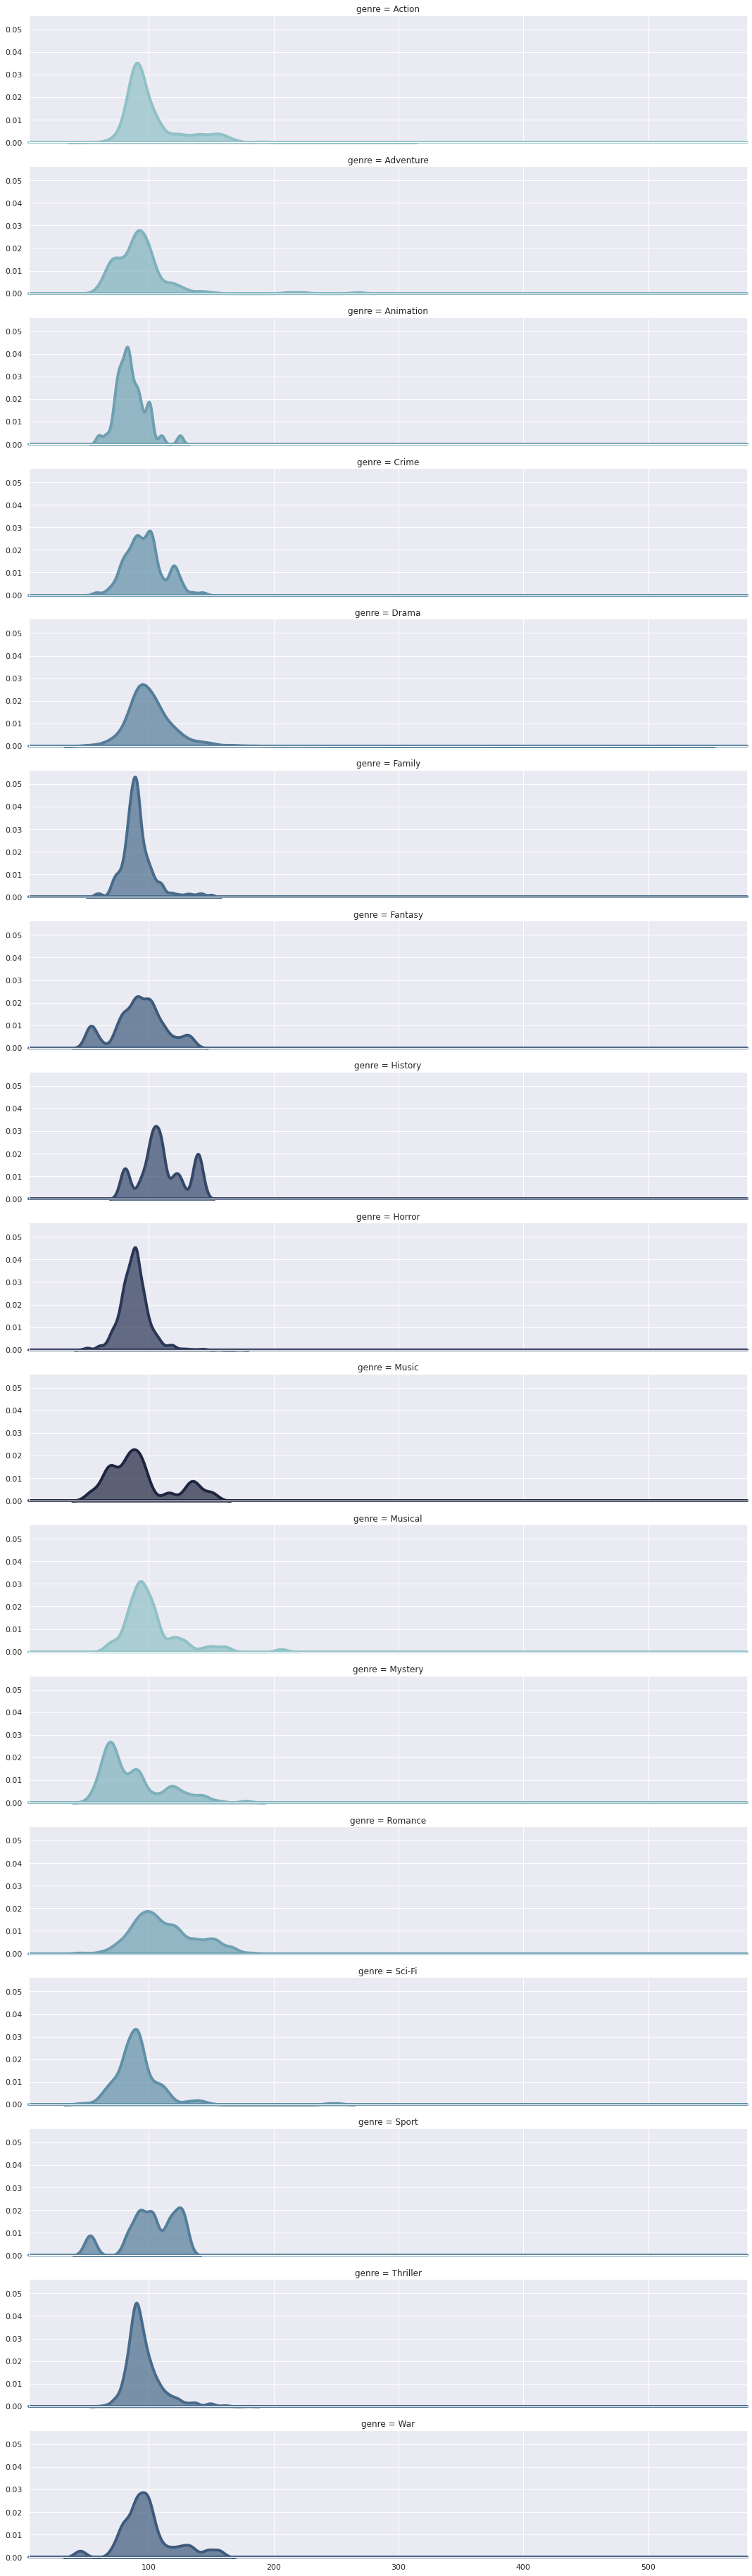

In [ ]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
sns.set(font_scale = 1)
ridge_plot = sns.FacetGrid(total_genres, row="genre", hue="genre", aspect=5, palette=pal)
ridge_plot.map(sns.kdeplot, "duration", clip_on=False, shade=True, alpha=0.7, lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=4 ,clip_on=False)
#plt.xlabel('Duration in minutes', fontsize=20)
#plt.ylabel('Densitatea în procente', fontsize=20)


#sns.set_xlabel("Durata în minute")
#sns.set_ylabel("Densitate în procente")
#sns.set_title("Durata și genul")

#ridge_plot.savefig("Ridgeline_plot_Seaborn_first_step.png")

# Concluzie



,index,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
17107,58809,tt1508669,Hopeful Notes,Hopeful Notes,2010,2010-12-15,Drama,94,USA,English,Valerio Zanoli,Valerio Zanoli,High Concept,"Walter Nudo, Colin Ross, Ian Poland, Laural Me...",A young violinist with leukemia brings hope an...,9.7,669,$ 1500000,NaN,NaN,NaN,2.0,2.0,9.7,669,9.7,10.0,623,6,7,6,6,7,2,2,6,4,NaN,NaN,8.5,18.0,7.4,39.0,5.2,21.0,6.6,58.0,NaN,NaN,5.4,7.0,7.7,34.0,4.4,17.0,8.4,19.0,NaN,NaN,9.9,10.0,4.8,4.0,8.8,4.0,7.5,6.0,8.7,41.0,9.7,396.0
7801,28453,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,"Stephen King, Frank Darabont",Castle Rock Entertainment,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845,$ 25000000,$ 28699976,$ 28815245,80.0,8232.0,164.0,9.3,2278845,9.1,10.0,1259076,582166,264604,84779,25558,13167,6419,4615,4303,34158,9.3,1898.0,9.3,489526.0,9.3,863727.0,9.1,204278.0,9.3,1392803.0,9.3,1327.0,9.3,389793.0,9.3,721951.0,9.1,165852.0,9.2,274168.0,9.0,267.0,9.2,88528.0,9.2,129249.0,9.2,34317.0,8.9,906.0,9.3,327264.0,9.2,887226.0
15137,52570,tt10218912,As I Am,As I Am,2019,2019-12-06,Drama,62,USA,English,Anthony Bawn,Anthony Bawn,APB Production,"Andre Myers, Jerimiyah Dunbar, Rodney Chester,...",A story of a young man running from the truth ...,9.3,1173,$ 10000,NaN,NaN,NaN,5.0,NaN,9.3,1173,9.3,10.0,856,6,270,5,6,6,3,3,2,16,NaN,NaN,7.0,20.0,8.8,313.0,4.9,22.0,7.2,234.0,NaN,NaN,4.5,6.0,8.0,208.0,4.0,16.0,9.7,124.0,NaN,NaN,8.3,14.0,9.9,104.0,9.8,6.0,5.6,7.0,8.4,125.0,9.4,670.0
23423,79532,tt6074834,Delaware Shore,Delaware Shore,2018,2018-12-21,Drama,98,USA,English,Raghav Peri,"Raghav Peri, Michaelangelo Rodriguez",Avocado Media,"James Robinson Jr., Kevin D. Benton, Bella Don...",A Holocaust survivor who escapes the concentra...,9.1,507,NaN,NaN,NaN,NaN,12.0,4.0,9.1,507,9.3,9.0,253,223,13,3,2,0,1,3,1,8,NaN,NaN,6.3,12.0,5.5,30.0,6.7,15.0,6.6,63.0,NaN,NaN,5.2,6.0,5.7,23.0,6.7,12.0,6.2,20.0,NaN,NaN,9.6,5.0,4.8,7.0,7.0,3.0,7.2,5.0,8.6,29.0,4.2,20.0
7698,28066,tt0109830,Forrest Gump,Forrest Gump,1994,1994-10-06,Drama,142,USA,English,Robert Zemeckis,"Winston Groom, Eric Roth",Paramount Pictures,"Tom Hanks, Rebecca Williams, Sally Field, Mich...","The presidencies of Kennedy and Johnson, the e...",8.8,1755490,$ 55000000,$ 330455270,$ 678229452,82.0,2416.0,169.0,8.8,1755490,8.7,9.0,603061,536316,361096,146404,49725,22185,11439,7519,5833,11912,8.9,1623.0,8.9,390199.0,8.8,642169.0,8.5,150859.0,8.8,1005336.0,9.0,1097.0,8.9,288051.0,8.8,511682.0,8.5,120171.0,8.7,262099.0,8.7,286.0,8.7,92554.0,8.7,120271.0,8.5,27542.0,8.3,923.0,8.7,252635.0,8.8,672604.0


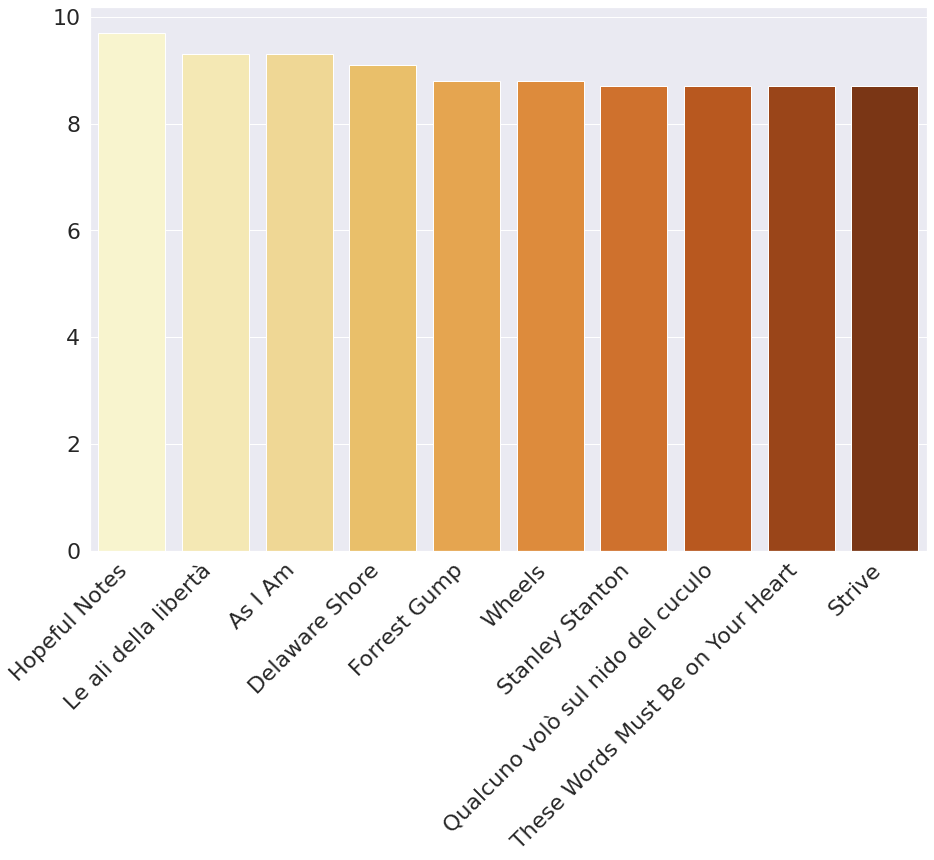

In [ ]:
df_drama.head()
df_drama=df_drama.sort_values(by=['avg_vote'],ascending=False)[:10]
plt.figure(figsize=(15,10))
e=sns.barplot(x='title', y='avg_vote',data=df_drama, palette="YlOrBr")
e.set_xticklabels(e.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
e.set_xlabel(None)
e.set_ylabel(None)
sns.color_palette("YlOrBr", as_cmap=True)
sns.set(font_scale = 3)
df_drama.head()

Genul câștigător din analizele noastre este Drama. Acest gen cel mai des s-a întâlnit prin topuri. Totuși, privind la graficele de mai sus, șanse are aproape orice fel de film. Dar în linii generale, criteriile de analiză chiar pot influența mult asupra ratingului filmului

# Linkurile către lucrările originale

În caz dacă ceva nu funcționează sau nu se afișează, aici se află toate linkurile la blocnetesurile originale.

Guțu Nicoleta - [scorul de încredere și nu numai](https://colab.research.google.com/drive/18akwhMN55glcpA8zd_hjyrqbbBt-MovC?usp=sharing#scrollTo=4jgxaNanZlSp).



Bianca-Cezara Beschieru - [evoluția și topul genului](https://colab.research.google.com/drive/1lQDxi9J1z9rTgDWheHHFnixqipI_m_bd?usp=sharing#scrollTo=_1q_PPAIWY-t).

Alexandra Mihalevschi - [durata și concordanța review-urilor](https://colab.research.google.com/drive/17bDyPqap1yeOIrn_lp1nHNdNgVv7KJkD?usp=sharing).